# Introduction to Data Analysis with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

# Objectives

* Handle tabular data with `pandas`

# The Python scientific stack: SciPy

Python Main Data Libraries

NumPy: Base N-dimensional array package

SciPy library: Fundamental library for scientific computing

Matplotlib: Comprehensive 2D Plotting

IPython: Enhanced Interactive Console

Sympy: Symbolic mathematics

pandas: Data structures & analysis

## `matplotlib`

## `pandas`

### Getting started with pandas

In [10]:
import pandas as pd

### `pandas` data structures

### Series

The base pandas abstraction. You can thing of it as the love child of a numpy array and a dictionary.

In [11]:
pd.Series([8, 7, 9, 0]) #  la izda está el índice, a la dcha los valores

0    8
1    7
2    9
3    0
dtype: int64

In [12]:
s = pd.Series([8, 7, 9, 0], index=list('abcd'))
s

a    8
b    7
c    9
d    0
dtype: int64

If we provide an index, pandas will use it. If not, it will automatically create one.

In [13]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [14]:
s.values

array([8, 7, 9, 0])

In [15]:
type(s.values) # Es un numpy array!

numpy.ndarray

We can create Series from dictionaries:

In [16]:
s2 = pd.Series({'a' : 7, 'x' : 2, 'y' : 5})
s2

a    7
x    2
y    5
dtype: int64

In [17]:
s['a']

8

And here is where the magic happens: numpy arrays only identify their contents by position. In contrast, pandas knows their "name" and will align them based on their indexes:

In [18]:
s.values + s2.values

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [29]:
s + s2 # Hace una unión cuando los índices coinciden, y si no salen NaN

a    15.0
b     NaN
c     NaN
d     NaN
x     NaN
y     NaN
dtype: float64

In [30]:
s * 2

a    16
b    14
c    18
d     0
dtype: int64

In [31]:
s % 2

a    0
b    1
c    1
d    0
dtype: int64

In [32]:
s % 2 == 0

a     True
b    False
c    False
d     True
dtype: bool

In [33]:
s

a    8
b    7
c    9
d    0
dtype: int64

In [34]:
s[s % 2 == 0] # Lo que va entre corchetes se suele llamar 'máscara' (o filtro)

a    8
d    0
dtype: int64

### DataFrame

This is the object you'll work most of the time with. It represents a table of _m_ observations x _n_ variables. Each variable, or column, is a Series.


```python
dfdata = {
    'province' : ['M', 'M', 'M', 'B', 'B'],
    'population': [1.5e6, 2e6, 3e6, 5e5, 1.5e6],
    'year' : [1900, 1950, 2000, 1900, 2000]   
}

df = pd.DataFrame(dfdata)
```

In [35]:
dfdata = {
    'province' : ['M', 'M', 'M', 'B', 'B'],
    'population': [1.5e6, 2e6, 3e6, 5e5, 1.5e6],
    'year' : [1900, 1950, 2000, 1900, 2000]   
}

df = pd.DataFrame(dfdata)
df

,province,population,year
0,M,1500000.0,1900
1,M,2000000.0,1950
2,M,3000000.0,2000
3,B,500000.0,1900
4,B,1500000.0,2000


In [36]:
df2 = pd.DataFrame(dfdata, columns = ['province', 'population', 'year', 'debt'])
df2

,province,population,year,debt
0,M,1500000.0,1900,NaN
1,M,2000000.0,1950,NaN
2,M,3000000.0,2000,NaN
3,B,500000.0,1900,NaN
4,B,1500000.0,2000,NaN


In [37]:
df['province'] # La forma BUENA de acceder a una columna

0    M
1    M
2    M
3    B
4    B
Name: province, dtype: object

In [38]:
df.province # Ésta es una MIERDA
# Se trata de un atributo creado de manera dinámica

0    M
1    M
2    M
3    B
4    B
Name: province, dtype: object

In [39]:
import numpy as np

df['2nd_language'] = np.nan
df['2nd_language']

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 2nd_language, dtype: float64

In [40]:
df.2nd_language # De este modo saca un error de sintaxis!! Lo mismo ocurriría si la columna contuviera un espacio

SyntaxError: invalid syntax (<ipython-input-40-8a4069b957ca>, line 1)

In [41]:
# Asimismo...
df['count'] = 0
df['count']

0    0
1    0
2    0
3    0
4    0
Name: count, dtype: int64

In [42]:
df.count # No es lo que buscaríamos !!

<bound method DataFrame.count of   province  population  year  2nd_language  count
0        M   1500000.0  1900           NaN      0
1        M   2000000.0  1950           NaN      0
2        M   3000000.0  2000           NaN      0
3        B    500000.0  1900           NaN      0
4        B   1500000.0  2000           NaN      0>

In [43]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [44]:
df.index = list('abcde')
df

,province,population,year,2nd_language,count
a,M,1500000.0,1900,NaN,0
b,M,2000000.0,1950,NaN,0
c,M,3000000.0,2000,NaN,0
d,B,500000.0,1900,NaN,0
e,B,1500000.0,2000,NaN,0


In [45]:
df.loc['a'] # Acceso por el nombre del índice. Cuidado!! Se permite crear dos filas con igual índice

province              M
population      1.5e+06
year               1900
2nd_language        NaN
count                 0
Name: a, dtype: object

In [46]:
df.iloc[0] # Acceso por el número del índice

province              M
population      1.5e+06
year               1900
2nd_language        NaN
count                 0
Name: a, dtype: object

In [47]:
df.T # Normalmente no interesa hacer esto porque cambia los tipos

,a,b,c,d,e
province,M,M,M,B,B
population,1.5e+06,2e+06,3e+06,500000,1.5e+06
year,1900,1950,2000,1900,2000
2nd_language,NaN,NaN,NaN,NaN,NaN
count,0,0,0,0,0


In [48]:
df['capital'] = df['province'] == 'M'
df['capital']

a     True
b     True
c     True
d    False
e    False
Name: capital, dtype: bool

In [49]:
df.describe()

,population,year,2nd_language,count
count,5.000000e+00,5.0,0.0,5.0
mean,1.700000e+06,1950.0,NaN,0.0
std,9.082951e+05,50.0,NaN,0.0
min,5.000000e+05,1900.0,NaN,0.0
25%,1.500000e+06,1900.0,NaN,0.0
50%,1.500000e+06,1950.0,NaN,0.0
75%,2.000000e+06,2000.0,NaN,0.0
max,3.000000e+06,2000.0,NaN,0.0


In [50]:
np.nan == np.nan # WTF!??

False

### Index objects

Indexes are immutable.

In [51]:
df.index[2]

'c'

In [52]:
df.index[2] = 'x'

TypeError: Index does not support mutable operations

In [53]:
# Slicing
df.index[2:]

Index(['c', 'd', 'e'], dtype='object')

### Dropping entries from an axis

In [54]:
s2 = pd.Series(np.random.randn(6), index=list('poiueh'))
s2

p    0.245317
o    0.513889
i    1.967987
u   -0.797869
e   -0.650669
h    0.517622
dtype: float64

In [55]:
s2.drop(['p', 'e'])

o    0.513889
i    1.967987
u   -0.797869
h    0.517622
dtype: float64

By default, `drop()` doesn't modify the original Series- it creates a copy. We can change that with the argument `inplace`.

In [56]:
s2.drop(['i'], inplace=True)
s2

p    0.245317
o    0.513889
u   -0.797869
e   -0.650669
h    0.517622
dtype: float64

In [57]:
df.drop('count') # Está pensado para el índice por defecto!

KeyError: "['count'] not found in axis"

In [58]:
df.drop('c')

,province,population,year,2nd_language,count,capital
a,M,1500000.0,1900,NaN,0,True
b,M,2000000.0,1950,NaN,0,True
d,B,500000.0,1900,NaN,0,False
e,B,1500000.0,2000,NaN,0,False


In [59]:
df.drop('2nd_language', axis=1) # También se podría hacer 'inplace'

,province,population,year,count,capital
a,M,1500000.0,1900,0,True
b,M,2000000.0,1950,0,True
c,M,3000000.0,2000,0,True
d,B,500000.0,1900,0,False
e,B,1500000.0,2000,0,False


### Indexing, selection, and filtering

The key here is that we can build boolean Series that we can use to index the original Series or DataFrame. Those booleans can be combined with bitwise boolean operators (&, |, ~) to get filters that are as complex as we need. 

In [60]:
# & = AND / | = OR / ~ = NOT

In [61]:
s3 = pd.Series([3e6, 6e6, 1.2e5, 7e5], index=list('BMPV'))
s3

B    3000000.0
M    6000000.0
P     120000.0
V     700000.0
dtype: float64

In [62]:
s3['P']

120000.0

In [63]:
s3[['P', 'M']]

P     120000.0
M    6000000.0
dtype: float64

In [64]:
s3[2]

120000.0

In [65]:
s3[2:]

P    120000.0
V    700000.0
dtype: float64

In [66]:
s3['P':]

P    120000.0
V    700000.0
dtype: float64

In [67]:
s3 > 2e5 # Serie generada de tipo booleano

B     True
M     True
P    False
V     True
dtype: bool

In [68]:
s3[s3 > 2e5] # Utilizamos esa serie como máscara (o filtro)
# Se lee como dame todos los elementos de s3 para los cuales el valor de s3 sea mayor de 2e5

B    3000000.0
M    6000000.0
V     700000.0
dtype: float64

In [69]:
df[df['population'] >= 2e6] # Dame aquellas filas para las cuales el valor de la columna population sea >= 2e6

,province,population,year,2nd_language,count,capital
b,M,2000000.0,1950,NaN,0,True
c,M,3000000.0,2000,NaN,0,True


In [70]:
df[df['population'] >= 2e6]['province'] # Dado que lo anterior en sí mismo es un DataFrame, si queremos solo una columna, le añadimos detrás un índice entre corchetes

b    M
c    M
Name: province, dtype: object

In [71]:
df[(df['population'] < 2e6) & (df['year'] > 1950)]

,province,population,year,2nd_language,count,capital
e,B,1500000.0,2000,NaN,0,False


In [72]:
small = df['population'] < 2e6
recent = df['year'] > 1950

small, recent, small & recent

(a     True
 b    False
 c    False
 d     True
 e     True
 Name: population, dtype: bool, a    False
 b    False
 c     True
 d    False
 e     True
 Name: year, dtype: bool, a    False
 b    False
 c    False
 d    False
 e     True
 dtype: bool)

In [73]:
small | recent

a     True
b    False
c     True
d     True
e     True
dtype: bool

In [74]:
df[~recent]['year']

a    1900
b    1950
d    1900
Name: year, dtype: int64

### Function application and mapping

Function application and mapping allows us to modify the elements of a DataFrame (columns with apply or elements with applymap) without for loops. This way we are not constrained to the functions already implemented by pandas or numpy.

In [75]:
# Las funciones de numpy funcionan muy bien con esto
np.sqrt(df['population'])

a    1224.744871
b    1414.213562
c    1732.050808
d     707.106781
e    1224.744871
Name: population, dtype: float64

In [76]:
np.sqrt(df) # Cuidado con los tipos!

AttributeError: 'str' object has no attribute 'sqrt'

In [77]:
import math

s3.apply(math.sqrt)

B    1732.050808
M    2449.489743
P     346.410162
V     836.660027
dtype: float64

This is a typical use case for lambdas (anonymous functions)

In [78]:
# lambda = función anónima
df['province'].apply(lambda arg: 'Madrid' if arg == 'M' else 'Barcelona')

a       Madrid
b       Madrid
c       Madrid
d    Barcelona
e    Barcelona
Name: province, dtype: object

In [79]:
df.apply(print) # Esto lo aplica a nivel de Serie, es decir, por cada columna

a    M
b    M
c    M
d    B
e    B
Name: province, dtype: object
a    1.5e+06
b      2e+06
c      3e+06
d     500000
e    1.5e+06
Name: population, dtype: object
a    1900
b    1950
c    2000
d    1900
e    2000
Name: year, dtype: object
a    NaN
b    NaN
c    NaN
d    NaN
e    NaN
Name: 2nd_language, dtype: object
a    0
b    0
c    0
d    0
e    0
Name: count, dtype: object
a     True
b     True
c     True
d    False
e    False
Name: capital, dtype: object


province        None
population      None
year            None
2nd_language    None
count           None
capital         None
dtype: object

In [80]:
df.applymap(type) # Aquí se ejecuta por cada elemento, es decir, filas*columnas veces
# En general, es mejor las funciones vectorizadas, ya que esto es mucho más lento

,province,population,year,2nd_language,count,capital
a,<class 'str'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'bool'>
b,<class 'str'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'bool'>
c,<class 'str'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'bool'>
d,<class 'str'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'bool'>
e,<class 'str'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'int'>,<class 'bool'>


In [81]:
sx = pd.Series(range(1000000))

In [82]:
%%timeit

np.sqrt(sx)

46.3 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [83]:
%%timeit

sx.apply(math.sqrt)

1.4 s ± 84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


En general, Python tiene fama de ser muy lento en cálculo numérico.

En el caso de `NumPy`, es mucho más rápido que las listas porque internamente los cálculos de `NumPy` llaman a librerías escritas en C o en Fortran, mucho más optimizadas

### Sorting and ranking

In [84]:
s3.sort_values()

P     120000.0
V     700000.0
B    3000000.0
M    6000000.0
dtype: float64

In [85]:
s3.sort_values(ascending=False)

M    6000000.0
B    3000000.0
V     700000.0
P     120000.0
dtype: float64

In [86]:
s3.sort_index(ascending=False)

V     700000.0
P     120000.0
M    6000000.0
B    3000000.0
dtype: float64

In [87]:
df.sort_index(ascending=False)

,province,population,year,2nd_language,count,capital
e,B,1500000.0,2000,NaN,0,False
d,B,500000.0,1900,NaN,0,False
c,M,3000000.0,2000,NaN,0,True
b,M,2000000.0,1950,NaN,0,True
a,M,1500000.0,1900,NaN,0,True


In [88]:
df.sort_values(by='population')

,province,population,year,2nd_language,count,capital
d,B,500000.0,1900,NaN,0,False
a,M,1500000.0,1900,NaN,0,True
e,B,1500000.0,2000,NaN,0,False
b,M,2000000.0,1950,NaN,0,True
c,M,3000000.0,2000,NaN,0,True


In [89]:
df.sort_values(by=['year', 'province']) # Primero ordena por year, y luego por province

,province,population,year,2nd_language,count,capital
d,B,500000.0,1900,NaN,0,False
a,M,1500000.0,1900,NaN,0,True
b,M,2000000.0,1950,NaN,0,True
e,B,1500000.0,2000,NaN,0,False
c,M,3000000.0,2000,NaN,0,True


rank() returns the positions of the elements of the Series in its sorted version. If there are ties, it will take averages.

In [90]:
s3, s3.rank()

(B    3000000.0
 M    6000000.0
 P     120000.0
 V     700000.0
 dtype: float64, B    3.0
 M    4.0
 P    1.0
 V    2.0
 dtype: float64)

In [91]:
s4 = pd.Series([43, 37, 34, 37], index=['RM', 'B', 'AM', 'V'])
s4.rank() # Se ve que en caso de empate, saca a ambos X.5

RM    4.0
B     2.5
AM    1.0
V     2.5
dtype: float64

In [92]:
s4.rank(method='dense') # Empaqueta a ambos como X

RM    3.0
B     2.0
AM    1.0
V     2.0
dtype: float64

#### Exercise

Write a function that takes a Series and returns the top 10% registers. In this case, earners. Test it with this Series:

```python
salaries = pd.Series([150000, 90000, 120000,30000,10000,5000,40000, 50000, 80000, 35000, 27000,14000, 28000, 22000,25000])
```

In [93]:
def earners(series):
    return series.sort_values(ascending=False)[:int(0.1 * series.size)] # El 'int' es porque sino saldría 1.5

salaries = pd.Series([150000, 90000, 120000,30000,10000,5000,40000, 50000, 80000, 35000, 27000,14000, 28000, 22000,25000])
    
earners(salaries)

0    150000
dtype: int64

In [94]:
def earners_v2(series):
    return series[series.rank(ascending=False) < salaries.size / 10]

salaries = pd.Series([150000, 90000, 120000,30000,10000,5000,40000, 50000, 80000, 35000, 27000,14000, 28000, 22000,25000])
    
earners_v2(salaries)

0    150000
dtype: int64

In [95]:
salaries[salaries.rank(ascending=False, pct=True) < .1]

0    150000
dtype: int64

In [96]:
salaries[salaries.rank(ascending=False) == 1]

0    150000
dtype: int64

## Summarizing and computing descriptive statistics

In [97]:
salaries.mean()

48400.0

In [98]:
salaries.median() # Se ve que los salarios extremos desplazan mucho la media, pero no la mediana

30000.0

In [99]:
salaries.std()

42619.24447946021

In [100]:
df.mean() # Saca la media de cada columna

population      1700000.0
year               1950.0
2nd_language          NaN
count                 0.0
capital               0.6
dtype: float64

In [101]:
df['capital'] # Como el 60% son True, te devuelve un 0.6 la media

a     True
b     True
c     True
d    False
e    False
Name: capital, dtype: bool

In [102]:
df.describe() # Muy cómodo para columnas numéricas

,population,year,2nd_language,count
count,5.000000e+00,5.0,0.0,5.0
mean,1.700000e+06,1950.0,NaN,0.0
std,9.082951e+05,50.0,NaN,0.0
min,5.000000e+05,1900.0,NaN,0.0
25%,1.500000e+06,1900.0,NaN,0.0
50%,1.500000e+06,1950.0,NaN,0.0
75%,2.000000e+06,2000.0,NaN,0.0
max,3.000000e+06,2000.0,NaN,0.0


In [103]:
df.mean(axis=1) # No tiene significado lógico, es solo por probar. Ya que está mezclando columnas

a    375475.25
b    500487.75
c    750500.25
d    125475.00
e    375500.00
dtype: float64

In [104]:
df.min(axis=1)

a    0.0
b    0.0
c    0.0
d    0.0
e    0.0
dtype: float64

As with many methods, we can use them in the direction perpendicular to their default.

### Unique values, value counts, and membership

In [107]:
dna = pd.Series(list('attaggctcagtatgaatgtagcatcaca'))
dna

0     a
1     t
2     t
3     a
4     g
5     g
6     c
7     t
8     c
9     a
10    g
11    t
12    a
13    t
14    g
15    a
16    a
17    t
18    g
19    t
20    a
21    g
22    c
23    a
24    t
25    c
26    a
27    c
28    a
dtype: object

In [108]:
dna.unique()

array(['a', 't', 'g', 'c'], dtype=object)

In [109]:
dna.value_counts()

a    10
t     8
g     6
c     5
dtype: int64

In [110]:
dna.isin(['g', 'c']).mean()

0.3793103448275862

In [112]:
dna[dna.isin(['g', 'c'])].index

Int64Index([4, 5, 6, 8, 10, 14, 18, 21, 22, 25, 27], dtype='int64')

## Handling missing data

In [113]:
np.random.seed(42) # Para tener todos los mismos valores (pseudoaleatoriedad)
s6 = pd.Series(np.random.choice(['Blond', 'Red', 'Black'], size=10))
s6[2:4] = np.nan
s6

0    Black
1    Blond
2      NaN
3      NaN
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

In [114]:
s6[s6 != np.nan] # ¿Por qué muestra también los 'NaN'?

0    Black
1    Blond
2      NaN
3      NaN
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

In [115]:
np.nan == np.nan # Esta es la respuesta

False

This is weird... but it has some really good reasons. You can find explanations [here](https://stackoverflow.com/questions/10034149/why-is-nan-not-equal-to-nan) and [here](https://stackoverflow.com/questions/1565164/what-is-the-rationale-for-all-comparisons-returning-false-for-ieee754-nan-values)

In [116]:
s6.isna()

0    False
1    False
2     True
3     True
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [117]:
s6[s6.isna()]

2    NaN
3    NaN
dtype: object

In [118]:
s6[s6.isnull()]

2    NaN
3    NaN
dtype: object

In [119]:
s6[s6.notnull()]

0    Black
1    Blond
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

In [120]:
s6[s6.notna()]

0    Black
1    Blond
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

In [121]:
s6 # Casi todo en Pandas devuelve una vista (view), a no ser que especifiquemos 'inplace'

0    Black
1    Blond
2      NaN
3      NaN
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

### Filtering out missing data

In [122]:
df.loc['c']['population'] = np.nan

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
df['2nd_language'] = [np.nan, np.nan, np.nan, 'Catalan', 'Catalan']
df

,province,population,year,2nd_language,count,capital
a,M,1500000.0,1900,NaN,0,True
b,M,2000000.0,1950,NaN,0,True
c,M,3000000.0,2000,NaN,0,True
d,B,500000.0,1900,Catalan,0,False
e,B,1500000.0,2000,Catalan,0,False


In [124]:
df[df.isna()]

,province,population,year,2nd_language,count,capital
a,NaN,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df.isna().any() # Hay algún False en cada una de las Series?

province        False
population      False
year            False
2nd_language     True
count           False
capital         False
dtype: bool

In [126]:
df.isna().all()  # Son todos True en la Serie?

province        False
population      False
year            False
2nd_language    False
count           False
capital         False
dtype: bool

any() and all() are functions of boolean Series. They reduce the Series to a single boolean value by applying repeatedly the operators "or" and "and", respectively.

In [127]:
df[df.isna().any()] # Peta porque está esperando nombres de columnas

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [128]:
df.columns[df.isna().any()]

Index(['2nd_language'], dtype='object')

In [129]:
df[df.columns[df.isna().any()]] # Saca las columnas que tengan algún NaN en sus filas

,2nd_language
a,NaN
b,NaN
c,NaN
d,Catalan
e,Catalan


In [130]:
df2 = pd.DataFrame(np.random.randn(12, 5),
                   columns=list('abcde'),
                   index=list('zxcvbnmlkjhg'))
df2.values[:2, 3:] = np.nan # df.values es un array compuesto por los valores del dataframe
df2.values[1:6, 2:4] = np.nan
df2.values[6] = np.nan
df2

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
x,-0.465730,0.241962,NaN,NaN,NaN
c,-1.012831,0.314247,NaN,NaN,1.465649
v,-0.225776,0.067528,NaN,NaN,0.110923
b,-1.150994,0.375698,NaN,NaN,-0.601707
n,1.852278,-0.013497,NaN,NaN,-1.220844
m,NaN,NaN,NaN,NaN,NaN
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [131]:
df2.dropna() # Elimina las filas que tengan CUALQUIER NaN, sea en una o varias columnas

,a,b,c,d,e
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280
h,-0.839218,-0.309212,0.331263,0.975545,-0.479174
g,-0.185659,-1.106335,-1.196207,0.812526,1.356240


In [132]:
df2.dropna(axis=1) # Vacío porque todas las columnas tienen al menos un NaN

""
z
x
c
v
b
n
m
l
k
j


In [133]:
df2.dropna(how='all') # Elimina solo las filas que tengan TODO NaN

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
x,-0.465730,0.241962,NaN,NaN,NaN
c,-1.012831,0.314247,NaN,NaN,1.465649
v,-0.225776,0.067528,NaN,NaN,0.110923
b,-1.150994,0.375698,NaN,NaN,-0.601707
n,1.852278,-0.013497,NaN,NaN,-1.220844
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280
h,-0.839218,-0.309212,0.331263,0.975545,-0.479174


In [134]:
df2.dropna(subset=['d', 'e']) # Solo se fija en las columnas 'd' y e'

,a,b,c,d,e
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280
h,-0.839218,-0.309212,0.331263,0.975545,-0.479174
g,-0.185659,-1.106335,-1.196207,0.812526,1.356240


In [135]:
df2.dropna(how='all', subset=['d', 'e'])

,a,b,c,d,e
c,-1.012831,0.314247,NaN,NaN,1.465649
v,-0.225776,0.067528,NaN,NaN,0.110923
b,-1.150994,0.375698,NaN,NaN,-0.601707
n,1.852278,-0.013497,NaN,NaN,-1.220844
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280
h,-0.839218,-0.309212,0.331263,0.975545,-0.479174
g,-0.185659,-1.106335,-1.196207,0.812526,1.356240


The thresh argument specifies the minimum number of non-null values required to keep a column (or row, with axis=1)

In [136]:
df2.dropna(thresh=3) # Especifica el mínimo número de NaN necesarios para eliminar o no una fila (axis=0, by default) o columna (axis=1). Así, solo se eliminaría la fila 'm'

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
c,-1.012831,0.314247,NaN,NaN,1.465649
v,-0.225776,0.067528,NaN,NaN,0.110923
b,-1.150994,0.375698,NaN,NaN,-0.601707
n,1.852278,-0.013497,NaN,NaN,-1.220844
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280
h,-0.839218,-0.309212,0.331263,0.975545,-0.479174
g,-0.185659,-1.106335,-1.196207,0.812526,1.356240


In [137]:
df2.dropna(axis=1, thresh=10) # Necesitaría 10 valores no-nulos para conservar la columna

,a,b
z,1.579213,0.767435
x,-0.465730,0.241962
c,-1.012831,0.314247
v,-0.225776,0.067528
b,-1.150994,0.375698
n,1.852278,-0.013497
m,NaN,NaN
l,0.171368,-0.115648
k,-0.460639,1.057122
j,-0.385082,-0.676922


### Filling in missing data

In [138]:
df2.fillna(0) # Sustituye todos los NaN por 0

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,0.000000,0.000000
x,-0.465730,0.241962,0.000000,0.000000,0.000000
c,-1.012831,0.314247,0.000000,0.000000,1.465649
v,-0.225776,0.067528,0.000000,0.000000,0.110923
b,-1.150994,0.375698,0.000000,0.000000,-0.601707
n,1.852278,-0.013497,0.000000,0.000000,-1.220844
m,0.000000,0.000000,0.000000,0.000000,0.000000
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [139]:
df2.fillna({'d' : 7, 'e' : 214}) # Sustituye los NaN por un valor según la columna

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,7.000000,214.000000
x,-0.465730,0.241962,NaN,7.000000,214.000000
c,-1.012831,0.314247,NaN,7.000000,1.465649
v,-0.225776,0.067528,NaN,7.000000,0.110923
b,-1.150994,0.375698,NaN,7.000000,-0.601707
n,1.852278,-0.013497,NaN,7.000000,-1.220844
m,NaN,NaN,NaN,7.000000,214.000000
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [140]:
df2.fillna(df2.median()) # Sustituye cada NaN con la mediana de su columna

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,0.812526,0.110923
x,-0.465730,0.241962,0.015080,0.812526,0.110923
c,-1.012831,0.314247,0.015080,0.812526,1.465649
v,-0.225776,0.067528,0.015080,0.812526,0.110923
b,-1.150994,0.375698,0.015080,0.812526,-0.601707
n,1.852278,-0.013497,0.015080,0.812526,-1.220844
m,-0.385082,0.067528,0.015080,0.812526,0.110923
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [141]:
df2.fillna(method='ffill') # forward fill : sustituye por el último valor rellenado
# Por ello, es muy útil para 'time series', de manera que va sustituyendo por el último, sin que haya saltos

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
x,-0.465730,0.241962,-0.469474,NaN,NaN
c,-1.012831,0.314247,-0.469474,NaN,1.465649
v,-0.225776,0.067528,-0.469474,NaN,0.110923
b,-1.150994,0.375698,-0.469474,NaN,-0.601707
n,1.852278,-0.013497,-0.469474,NaN,-1.220844
m,1.852278,-0.013497,-0.469474,NaN,-1.220844
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [142]:
df2.fillna(method='ffill').fillna(method='bfill') # Primero aplicaría el ffill, y luego el bfill

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,-1.478522,1.465649
x,-0.465730,0.241962,-0.469474,-1.478522,1.465649
c,-1.012831,0.314247,-0.469474,-1.478522,1.465649
v,-0.225776,0.067528,-0.469474,-1.478522,0.110923
b,-1.150994,0.375698,-0.469474,-1.478522,-0.601707
n,1.852278,-0.013497,-0.469474,-1.478522,-1.220844
m,1.852278,-0.013497,-0.469474,-1.478522,-1.220844
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [143]:
df2

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
x,-0.465730,0.241962,NaN,NaN,NaN
c,-1.012831,0.314247,NaN,NaN,1.465649
v,-0.225776,0.067528,NaN,NaN,0.110923
b,-1.150994,0.375698,NaN,NaN,-0.601707
n,1.852278,-0.013497,NaN,NaN,-1.220844
m,NaN,NaN,NaN,NaN,NaN
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [144]:
# Con Shift-Tab se saca la ayuda dinámica

df2.interpolate() # Aquí, la fila 'm' es fruto de la interpolación entre las filas 'n' y 'l'

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
x,-0.465730,0.241962,-0.445421,NaN,NaN
c,-1.012831,0.314247,-0.421368,NaN,1.465649
v,-0.225776,0.067528,-0.397316,NaN,0.110923
b,-1.150994,0.375698,-0.373263,NaN,-0.601707
n,1.852278,-0.013497,-0.349210,NaN,-1.220844
m,1.011823,-0.064573,-0.325157,NaN,-0.970344
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


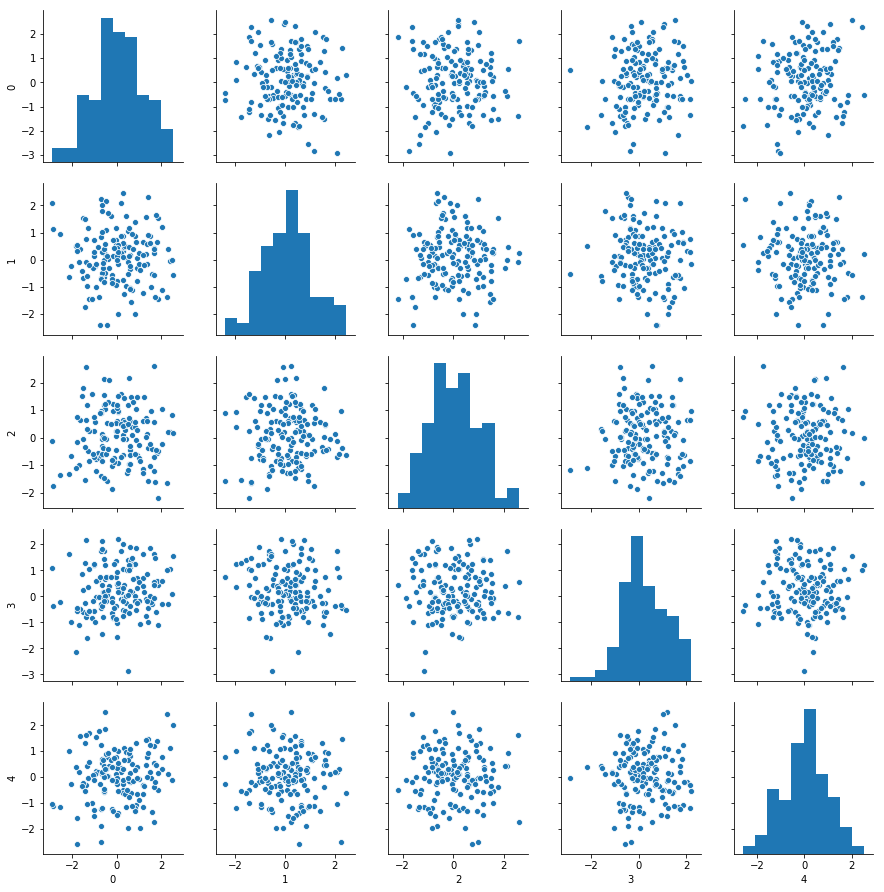

In [148]:
# Para localizar datos sin sentido, y limpiarlos antes de comenzar se utiliza como primer tiro gráficas

import seaborn as sns

sns.pairplot(pd.DataFrame(np.random.randn(150, 5)))

# Loading and saving data

## Loading CSV

In [154]:
!unzip /home/dsc/Data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2015.zip # Descomprime en la carpeta del Notebook

Archive:  /home/dsc/Data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2015.zip
  inflating: 914310910_T_T100_SEGMENT_ALL_CARRIER_2015_All.csv  
  inflating: 914310910_T_T100_SEGMENT_ALL_CARRIER_ReadMe.csv  
  inflating: 914310910_T_T100_SEGMENT_ALL_CARRIER_Terms.csv  


In [155]:
df = pd.read_csv('914310910_T_T100_SEGMENT_ALL_CARRIER_2015_All.csv')

# Existen muchas variaciones para eliminar filas iniciales sin nada de info, nombrar columnas, índices, etc.

In [156]:
df.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 50
0,0.0,1.0,528.0,11.0,2.0,0.0,0.0,3899.0,0.0,0.0,...,6,669,1,2015,1,1,8,L,IF,NaN
1,0.0,2.0,3621.0,22.0,2.0,0.0,0.0,2589.0,0.0,0.0,...,6,669,1,2015,1,1,6,L,IF,NaN
2,0.0,1.0,2169.0,11.0,2.0,0.0,0.0,1210.0,0.0,0.0,...,6,669,1,2015,1,1,3,L,DF,NaN
3,0.0,1.0,1342.0,11.0,1.0,0.0,0.0,2316.0,0.0,0.0,...,6,669,1,2015,1,1,5,L,IF,NaN
4,0.0,1.0,275.0,11.0,1.0,0.0,0.0,1023.0,0.0,0.0,...,6,669,1,2015,1,1,3,L,DF,NaN


In [157]:
df.shape

(146938, 51)

## Saving to Excel

In [158]:
df.head(10000).to_excel('deps.xlsx') # También hay muchas opciones de personalización para este método

## Saving to CSV

In [159]:
df.head(10000).to_csv('deps.csv')

## To Sql Database

In [160]:
import sqlite3

connection = sqlite3.connect('db.sql') # Con esto creas una conexión a una DB de nueva creación
df.head(10000).to_sql('deps', connection, if_exists='replace') # Aquí le indico dónde volcar la info
# 'deps' es el nombre de la tabla SQL / "if_exists" hace referencia a qué hacer si existe la tabla

# Esto valdría también para Posgres, por ejemplo

/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


## To dictionary and to json

In [161]:
df.head().to_dict()

{'DEPARTURES_SCHEDULED': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'DEPARTURES_PERFORMED': {0: 1.0, 1: 2.0, 2: 1.0, 3: 1.0, 4: 1.0},
 'PAYLOAD': {0: 528.0, 1: 3621.0, 2: 2169.0, 3: 1342.0, 4: 275.0},
 'SEATS': {0: 11.0, 1: 22.0, 2: 11.0, 3: 11.0, 4: 11.0},
 'PASSENGERS': {0: 2.0, 1: 2.0, 2: 2.0, 3: 1.0, 4: 1.0},
 'FREIGHT': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'MAIL': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'DISTANCE': {0: 3899.0, 1: 2589.0, 2: 1210.0, 3: 2316.0, 4: 1023.0},
 'RAMP_TO_RAMP': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'AIR_TIME': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'UNIQUE_CARRIER': {0: '10Q', 1: '10Q', 2: '10Q', 3: '10Q', 4: '10Q'},
 'AIRLINE_ID': {0: 21407.0, 1: 21407.0, 2: 21407.0, 3: 21407.0, 4: 21407.0},
 'UNIQUE_CARRIER_NAME': {0: 'Swiss Air Ambulance',
  1: 'Swiss Air Ambulance',
  2: 'Swiss Air Ambulance',
  3: 'Swiss Air Ambulance',
  4: 'Swiss Air Ambulance'},
 'UNIQUE_CARRIER_ENTITY': {0: '71084',
  1: '71084',
  2: '71084',
  3: '71084',
  4

In [162]:
df.head().to_json() # Muy útil para crear APIs (para crear funciones de uso online. E.g. pasar URL a Google y te da una dirección postal)

'{"DEPARTURES_SCHEDULED":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"DEPARTURES_PERFORMED":{"0":1.0,"1":2.0,"2":1.0,"3":1.0,"4":1.0},"PAYLOAD":{"0":528.0,"1":3621.0,"2":2169.0,"3":1342.0,"4":275.0},"SEATS":{"0":11.0,"1":22.0,"2":11.0,"3":11.0,"4":11.0},"PASSENGERS":{"0":2.0,"1":2.0,"2":2.0,"3":1.0,"4":1.0},"FREIGHT":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"MAIL":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"DISTANCE":{"0":3899.0,"1":2589.0,"2":1210.0,"3":2316.0,"4":1023.0},"RAMP_TO_RAMP":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"AIR_TIME":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"UNIQUE_CARRIER":{"0":"10Q","1":"10Q","2":"10Q","3":"10Q","4":"10Q"},"AIRLINE_ID":{"0":21407.0,"1":21407.0,"2":21407.0,"3":21407.0,"4":21407.0},"UNIQUE_CARRIER_NAME":{"0":"Swiss Air Ambulance","1":"Swiss Air Ambulance","2":"Swiss Air Ambulance","3":"Swiss Air Ambulance","4":"Swiss Air Ambulance"},"UNIQUE_CARRIER_ENTITY":{"0":"71084","1":"71084","2":"71084","3":"71084","4":"71084"},"REGION":{"0":"I","1":"I","2":

## Reading Excel

In [167]:
%%timeit

pd.read_excel('deps.xlsx')

21.7 s ± 554 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [163]:
pd.read_excel('deps.xlsx')

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 50
0,0,1,528,11,2,0,0,3899,0,0,...,6,669,1,2015,1,1,8,L,IF,NaN
1,0,2,3621,22,2,0,0,2589,0,0,...,6,669,1,2015,1,1,6,L,IF,NaN
2,0,1,2169,11,2,0,0,1210,0,0,...,6,669,1,2015,1,1,3,L,DF,NaN
3,0,1,1342,11,1,0,0,2316,0,0,...,6,669,1,2015,1,1,5,L,IF,NaN
4,0,1,275,11,1,0,0,1023,0,0,...,6,669,1,2015,1,1,3,L,DF,NaN
5,0,1,264,11,1,0,0,3934,0,0,...,6,669,1,2015,1,1,8,L,IF,NaN
6,0,1,5619,12,1,0,0,3678,0,0,...,6,658,1,2015,1,1,8,L,IF,NaN
7,0,1,5150,14,5,0,0,5341,0,0,...,6,658,1,2015,1,1,11,L,IF,NaN
8,0,1,5619,12,1,0,0,3678,0,0,...,6,658,1,2015,1,1,8,L,IF,NaN
9,0,1,5150,14,6,0,0,93,0,0,...,6,658,1,2015,1,1,1,L,DF,NaN


In [164]:
accidents = pd.read_excel('01_ACCIDENTES_POR_TIPO_EN_DISTRITOS.xls', 
                          sheet_name='2010', 
                          skiprows=7,
                          skipfooter=1)
accidents

,DISTRITO_ACCIDENTE,COLISIÓN DOBLE,COLISIÓN MÚLTIPLE,CHOQUE CON OBJETO FIJO,ATROPELLO,VUELCO,CAÍDA MOTOCICLETA,CAÍDA CICLOMOTOR,CAÍDA BICICLETA,CAÍDA VIAJERO BUS,OTRAS CAUSAS,Unnamed: 11
0,ARGANZUELA,403,48,103,75,7,26,15.0,2.0,5.0,6.0,690
1,BARAJAS,62,5,34,22,1,11,NaN,NaN,NaN,NaN,135
2,CARABANCHEL,357,35,133,114,7,22,14.0,6.0,7.0,1.0,696
3,CENTRO,546,43,142,169,2,60,14.0,9.0,13.0,9.0,1007
4,CHAMARTIN,460,67,128,85,11,77,16.0,1.0,8.0,5.0,858
5,CHAMBERI,361,34,86,103,1,66,14.0,5.0,2.0,4.0,676
6,CIUDAD LINEAL,404,79,120,90,8,39,12.0,6.0,7.0,2.0,767
7,FUENCARRAL-EL PARDO,294,49,165,72,10,26,9.0,6.0,3.0,2.0,636
8,HORTALEZA,183,15,68,44,4,11,8.0,4.0,3.0,3.0,343
9,LATINA,273,37,93,94,6,24,4.0,7.0,10.0,4.0,552


#### Exercise

Consolidate the excel into one DataFrame: you will need to create a 'YEAR' column. Think how you can iterate through all the DataFrames. Think also where you can take the value of 'YEAR' from.

In [234]:
accidents = pd.ExcelFile('01_ACCIDENTES_POR_TIPO_EN_DISTRITOS.xls') # Para leerlo una sola vez (tiempos)
df = pd.DataFrame({}) # Crear un DataFrame vacío al que 'concatenar' cada Sheet
years = accidents.sheet_names # Lista que contiene los nombres de cada Sheet
for year in years: 
    if year == '2013': # Tiene el encabezado distinto (3 filas menos)
        df_year = pd.read_excel(accidents, 
                                sheet_name=year, 
                                skiprows=4,
                                skipfooter=1)
    else:
        df_year = pd.read_excel(accidents, 
                                sheet_name=year, 
                                skiprows=7,
                                skipfooter=1)
    df_year['YEAR'] = year # Asigna a todas las filas de cada subDataFrame el año que le toca
    cols = df_year.columns.tolist() # Genera una lista con las columnas en orden original para luego recolocarlas
    df = pd.concat([df, df_year], ignore_index=True, sort=False) # Va concatenando cada subDataFrame al "total"
df = df[cols] # Utiliza la lista creada anteriormente para reasignar el orden original al DataFrame "total"
df.rename(columns={"Unnamed: 12": "TOTAL"}, inplace=True)
pd.set_option('display.max_rows', df.shape[0]+1) # Para que muestre todas las filas en el output
df

,DISTRITO_ACCIDENTE,COLISIÓN DOBLE,COLISIÓN MÚLTIPLE,CHOQUE CON OBJETO FIJO,ATROPELLO,VUELCO,CAÍDA MOTOCICLETA,CAÍDA CICLOMOTOR,CAÍDA BICICLETA,CAÍDA VIAJERO BUS,OTRAS CAUSAS,CAÍDA VEHÍCULO 3 RUEDAS,TOTAL,YEAR
0,ARGANZUELA,389,54,126,75,9.0,43,9.0,4.0,5.0,8.0,NaN,NaN,2009
1,BARAJAS,89,6,53,21,NaN,12,2.0,1.0,2.0,2.0,NaN,NaN,2009
2,CARABANCHEL,375,44,171,137,8.0,36,13.0,6.0,9.0,8.0,NaN,NaN,2009
3,CENTRO,514,55,171,143,NaN,61,12.0,3.0,10.0,12.0,NaN,NaN,2009
4,CHAMARTIN,494,70,133,92,10.0,72,22.0,2.0,6.0,7.0,NaN,NaN,2009
5,CHAMBERI,414,35,87,87,3.0,51,12.0,4.0,4.0,5.0,NaN,NaN,2009
6,CIUDAD LINEAL,398,64,124,101,3.0,57,17.0,5.0,4.0,4.0,NaN,NaN,2009
7,FUENCARRAL-EL PARDO,321,47,151,78,11.0,34,16.0,7.0,2.0,8.0,NaN,NaN,2009
8,HORTALEZA,215,16,109,58,3.0,29,13.0,7.0,4.0,4.0,NaN,NaN,2009
9,LATINA,298,40,134,85,7.0,24,10.0,2.0,9.0,11.0,NaN,NaN,2009


In [235]:
%%timeit

accidents = pd.ExcelFile('01_ACCIDENTES_POR_TIPO_EN_DISTRITOS.xls') # Para leerlo una sola vez (tiempos)
df = pd.DataFrame({}) # Crear un DataFrame vacío al que 'concatenar' cada Sheet
years = accidents.sheet_names # Lista que contiene los nombres de cada Sheet
for year in years: 
    if year == '2013': # Tiene el encabezado distinto (3 filas menos)
        df_year = pd.read_excel(accidents, 
                                sheet_name=year, 
                                skiprows=4,
                                skipfooter=1)
    else:
        df_year = pd.read_excel(accidents, 
                                sheet_name=year, 
                                skiprows=7,
                                skipfooter=1)
    df_year['YEAR'] = year # Asigna a todas las filas de cada subDataFrame el año que le toca
    cols = df_year.columns.tolist() # Genera una lista con las columnas en orden original para luego recolocarlas
    df = pd.concat([df, df_year], ignore_index=True, sort=False) # Va concatenando cada subDataFrame al "total"
df = df[cols] # Utiliza la lista creada anteriormente para reasignar el orden original al DataFrame "total"
df.rename(columns={"Unnamed: 12": "TOTAL"}, inplace=True)
pd.set_option('display.max_rows', df.shape[0]+1) # Para que muestre todas las filas en el output
df

776 ms ± 229 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Reading mysql database

In [168]:
%%timeit

cxn = sqlite3.connect('db.sql')
pd.read_sql('SELECT * FROM deps', cxn) # Recordemos que 'deps' era la tabla SQL

990 ms ± 35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Se ve que tratando la misma info a través de Excel (.xlsx) se tarda del orden de **20 veces más** que procesándola mediante SQL (.sql)

In [165]:
cxn = sqlite3.connect('db.sql')
pd.read_sql('SELECT * FROM deps', cxn) # Recordemos que 'deps' era la tabla SQL

,index,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,...,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 50
0,0,0.0,1.0,528.0,11.0,2.0,0.0,0.0,3899.0,0.0,...,6,669,1,2015,1,1,8,L,IF,None
1,1,0.0,2.0,3621.0,22.0,2.0,0.0,0.0,2589.0,0.0,...,6,669,1,2015,1,1,6,L,IF,None
2,2,0.0,1.0,2169.0,11.0,2.0,0.0,0.0,1210.0,0.0,...,6,669,1,2015,1,1,3,L,DF,None
3,3,0.0,1.0,1342.0,11.0,1.0,0.0,0.0,2316.0,0.0,...,6,669,1,2015,1,1,5,L,IF,None
4,4,0.0,1.0,275.0,11.0,1.0,0.0,0.0,1023.0,0.0,...,6,669,1,2015,1,1,3,L,DF,None
5,5,0.0,1.0,264.0,11.0,1.0,0.0,0.0,3934.0,0.0,...,6,669,1,2015,1,1,8,L,IF,None
6,6,0.0,1.0,5619.0,12.0,1.0,0.0,0.0,3678.0,0.0,...,6,658,1,2015,1,1,8,L,IF,None
7,7,0.0,1.0,5150.0,14.0,5.0,0.0,0.0,5341.0,0.0,...,6,658,1,2015,1,1,11,L,IF,None
8,8,0.0,1.0,5619.0,12.0,1.0,0.0,0.0,3678.0,0.0,...,6,658,1,2015,1,1,8,L,IF,None
9,9,0.0,1.0,5150.0,14.0,6.0,0.0,0.0,93.0,0.0,...,6,658,1,2015,1,1,1,L,DF,None


In [166]:
cxn = sqlite3.connect('db.sql')
pd.read_sql('SELECT * FROM deps WHERE "DEPARTURES_PERFORMED" > 5', cxn)

,index,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,...,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 50
0,14,0.0,9.0,562962.0,2548.0,2154.0,0.0,0.0,2188.0,0.0,...,6,696,1,2015,1,1,5,F,IF,None
1,15,0.0,18.0,1237995.0,5159.0,4905.0,0.0,0.0,1873.0,0.0,...,6,696,1,2015,1,1,4,F,IF,None
2,16,0.0,9.0,565173.0,2595.0,2156.0,0.0,0.0,2188.0,0.0,...,6,696,1,2015,1,1,5,F,IF,None
3,17,0.0,18.0,1237436.0,5109.0,4855.0,0.0,0.0,1873.0,0.0,...,6,696,1,2015,1,1,4,F,IF,None
4,19,0.0,9.0,910800.0,2835.0,1666.0,2882.0,0.0,4879.0,0.0,...,6,696,1,2015,1,1,10,F,IF,None
5,21,0.0,9.0,910800.0,2835.0,1758.0,39954.0,0.0,4879.0,0.0,...,6,696,1,2015,1,1,10,F,IF,None
6,22,0.0,23.0,2345933.0,6793.0,4946.0,454689.0,0.0,3749.0,0.0,...,6,696,1,2015,1,1,8,F,IF,None
7,23,0.0,29.0,2557427.0,8525.0,7094.0,621786.0,0.0,4733.0,0.0,...,6,696,1,2015,1,1,10,F,IF,None
8,24,0.0,12.0,1049765.0,3569.0,2435.0,224246.0,0.0,4757.0,0.0,...,6,696,1,2015,1,1,10,F,IF,None
9,25,0.0,23.0,2401058.0,6793.0,5503.0,647284.0,0.0,3749.0,0.0,...,6,696,1,2015,1,1,8,F,IF,None


# Additional References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)

[What is SciPy?](https://www.scipy.org/)

[How can SciPy be fast if it is written in an interpreted language like Python?](https://www.scipy.org/scipylib/faq.html#how-can-scipy-be-fast-if-it-is-written-in-an-interpreted-language-like-python)

*Actually, the time-critical loops are usually implemented in C, C++, or Fortran. Parts of SciPy are thin layers of code on top of the scientific routines that are freely available at http://www.netlib.org/. Netlib is a huge repository of incredibly valuable and robust scientific algorithms written in C and Fortran. It would be silly to rewrite these algorithms and would take years to debug them. SciPy uses a variety of methods to generate “wrappers” around these algorithms so that they can be used in Python. Some wrappers were generated by hand coding them in C. The rest were generated using either SWIG or f2py. Some of the newer contributions to SciPy are either written entirely or wrapped with Cython.*

*A second answer is that for difficult problems, a better algorithm can make a tremendous difference in the time it takes to solve a problem. So, using SciPy’s built-in algorithms may be much faster than a simple algorithm coded in C.*

[What is the difference between NumPy and SciPy?](https://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy)

*In an ideal world, NumPy would contain nothing but the array data type and the most basic operations: indexing, sorting, reshaping, basic elementwise functions, etc. All numerical code would reside in SciPy. However, one of NumPy’s important goals is compatibility, so NumPy tries to retain all features supported by either of its predecessors. Thus, NumPy contains some linear algebra functions and Fourier transforms, even though these more properly belong in SciPy. In any case, SciPy contains more fully-featured versions of the linear algebra modules, as well as many other numerical algorithms. If you are doing scientific computing with Python, you should probably install both NumPy and SciPy. Most new features belong in SciPy rather than NumPy.*

[Linear Algebra for AI](https://github.com/fastai/numerical-linear-algebra)

Curso: *Computational Linear Algebra for Coders*